## 모델 불러오기

In [2]:
## 라이브러리 설치
##pip install trimesh

In [3]:
import trimesh
model = trimesh.load('./obj/model.stl')
model.show()

In [4]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
model.merge_vertices()
# 변수에 저장
vertices = model.vertices

## 시각화

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# plt.scatter(vertices[:,0], vertices[:,1])
# plt.scatter(vertices[:,0], vertices[:,2])
# plt.scatter(vertices[:,1], vertices[:,2])

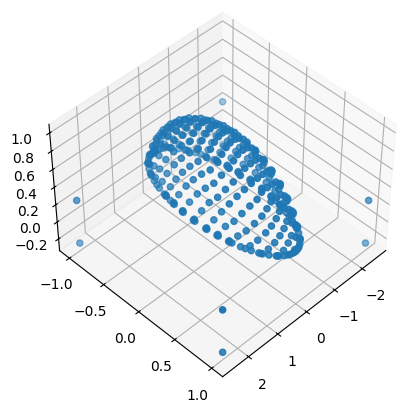

In [7]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])


## 샘플 추출
https://trimesh.org/trimesh.sample.html

In [8]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]
points

TrackedArray([[-1.23276869e+00, -5.31932992e-01, -2.50000000e-01],
              [ 8.73791594e-01, -3.59066431e-01,  3.16988090e-01],
              [ 1.06811885e+00, -1.00000000e+00, -4.93586302e-02],
              [ 8.29142347e-01, -1.00346498e-01,  5.43843328e-01],
              [-1.62547147e+00, -1.00000000e+00, -7.48121387e-02],
              [ 1.55070053e+00, -1.00000000e+00, -2.02376598e-01],
              [ 2.50000000e+00,  5.34387932e-01,  2.12857176e-01],
              [ 1.04040210e-01, -3.07805687e-01, -2.50000000e-01],
              [-1.41362330e+00,  9.88662782e-01,  2.50000000e-01],
              [ 1.47287665e+00,  8.99956734e-01, -2.50000000e-01],
              [-1.63646589e+00,  8.78547031e-01,  2.50000000e-01],
              [-1.83030013e+00, -7.82111823e-02,  2.50000000e-01],
              [-2.50000000e+00, -3.79350324e-01, -2.20818531e-01],
              [ 2.03424147e+00, -3.10486401e-01,  2.50000000e-01],
              [-1.77578817e-01,  9.08791084e-01,  3.69382370e-

In [9]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

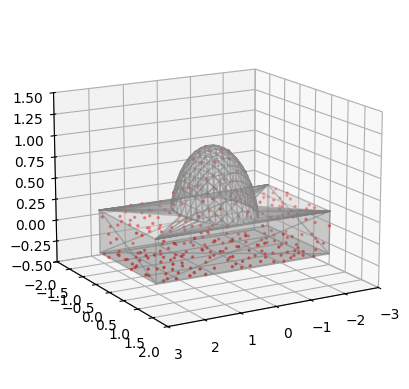

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=2)
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=15, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

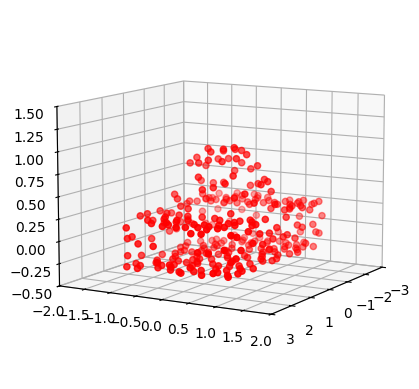

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(points)

In [14]:
df

,0,1,2
0,-1.232769,-0.531933,-0.250000
1,0.873792,-0.359066,0.316988
2,1.068119,-1.000000,-0.049359
3,0.829142,-0.100346,0.543843
4,-1.625471,-1.000000,-0.074812
...,...,...,...
295,-0.710570,-1.000000,0.043031
296,-1.487444,0.762929,0.250000
297,1.288624,-0.226515,-0.250000
298,-0.265328,0.636767,-0.250000


In [15]:
df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [16]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [17]:
total = dens.sum().sum()

In [18]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [19]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [20]:
len(points)

300

In [21]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [22]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# # 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# 차분을 통해 탄젠트 벡터 계산
tangent_vectors = np.diff(sorted_points, axis=0)

# 단위 벡터로 표준화 (길이가 1인 벡터)
tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [23]:
normals = []
num_points = len(sorted_points) - 2

for i in range(num_points):
    # 세 개의 인접한 점을 선택 (간단히 인덱스를 기준으로 선택)
    p1 = np.array(sorted_points[i])
    p2 = np.array(sorted_points[(i + 1)])  # 다음 점
    p3 = np.array(sorted_points[(i + 2)])  # 다다음 점
    
    # 법선 벡터 계산
        # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)
    
    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal = np.cross(v1, v2)
    
    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal)
    if norm != 0:
        normal = normal / norm
    
    normals.append(normal)

In [24]:
# tvec = np.diff(normals)
normals = np.array(normals)
normals

array([[-0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -1.00000000e+00],
       [-2.59380030e-02,  5.70392536e-02,  9.98034941e-01],
       [ 6.44533382e-02,  7.06053328e-02,  9.95419838e-01],
       [-1.63391640e-02, -2.66527732e-01, -9.63688746e-01],
       [-6.05464252e-02, -9.87645476e-01, -1.44535615e-01],
       [-5.06345616e-02, -9.87514140e-01, -1.49170920e-01],
       [-1.90213992e-01,  8.06100059e-01, -5.60376062e-01],
       [ 3.31699916e-01, -7.46209111e-01,  5.77188988e-01],
       [ 5.46706087e-01, -8.27478718e-01, -1.28029005e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.43442201e-01,  8.89406186e-01, -4.34028767e-01],
       [-6.17975814e-01, -6.67487202e-01,  4.15411517e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00

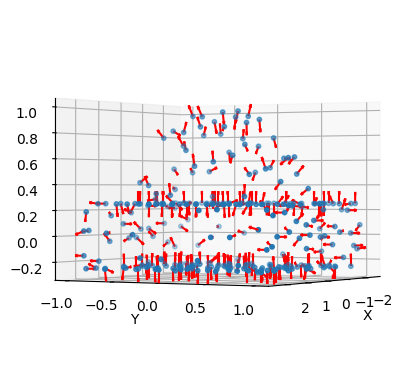

In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=30)

# 플롯 보여주기
plt.show()

In [26]:
# sort_neighbor
# tangent_vectors

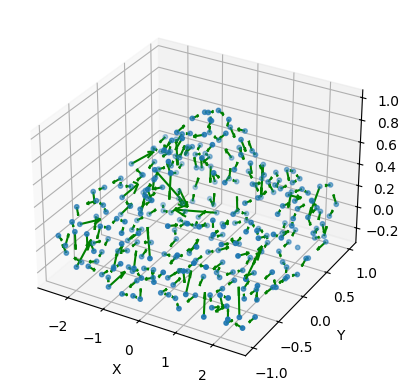

In [27]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='g')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

## 이동시키는 법
### 벡터에 스칼라값 곱해서
점 위치를 동일하게 떨어뜨리기 필요

In [28]:
## 점 이동 시키기
point_moved = sorted_points.copy()
point_moved[1:] = point_moved[1:] + 0.5 * tangent_vectors
point_moved

array([[-1.23276869e+00, -5.31932992e-01, -2.50000000e-01],
       [-9.55746541e-01, -6.03439494e-01, -2.50000000e-01],
       [-7.89952365e-01, -4.28721053e-01, -2.50000000e-01],
       [-5.27724005e-01, -4.40302362e-01, -2.50000000e-01],
       [-3.77307398e-01, -6.39760593e-01, -2.50000000e-01],
       [-8.70577808e-01, -7.61488315e-01, -2.50000000e-01],
       [-6.67476102e-01, -1.14990790e+00, -2.22522790e-01],
       [-3.51998393e-01, -9.21385661e-01, -2.59159070e-01],
       [-1.34583925e-01, -9.67830597e-01, -2.50000000e-01],
       [-8.80088715e-02, -1.01945806e+00,  8.32720298e-02],
       [-4.40079050e-01, -1.00000000e+00,  7.39659865e-02],
       [-4.76983326e-01, -7.78981669e-01,  4.04427281e-01],
       [-7.85188533e-01, -1.07367278e+00,  2.00560696e-01],
       [-7.32231831e-01, -1.00000000e+00, -4.94678284e-02],
       [-1.01197108e+00, -1.00000000e+00, -5.65790405e-02],
       [-8.39444026e-01, -8.11511403e-01,  3.86687855e-01],
       [-1.17828164e+00, -5.82875195e-01

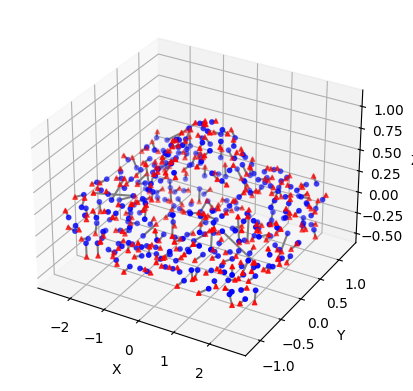

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(point_moved[:, 0], point_moved[:, 1], point_moved[:, 2], marker='^', s=10, color="red")
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, color="blue")

# 같은 인덱스끼리 선으로 연결
for i in range(len(points)):
    ax.plot([sorted_points[i, 0], point_moved[i, 0]], 
            [sorted_points[i, 1], point_moved[i, 1]], 
            [sorted_points[i, 2], point_moved[i, 2]], color="gray", linestyle="-")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

점들의 법선벡터 구하고 법선벡터의 수직인 벡터 차분

In [30]:
import open3d as o3d
import numpy as np

# 이미 추출된 점들을 numpy 배열로 변환
# points = np.array([[x1, y1, z1], [x2, y2, z2], ...])  # 추출된 표면의 점들

# 포인트 클라우드 생성
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 법선 벡터 계산 (k-인접한 이웃을 통해 법선 추정)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50))

# 계산된 법선 벡터 출력
normals = np.asarray(pcd.normals)
print(normals)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 6.93396128e-03 -9.00866053e-02 -9.95909797e-01]
 [ 5.13456454e-01 -3.42157035e-01  7.86950464e-01]
 [-3.40942244e-02  1.02308070e-02 -9.99366256e-01]
 [ 6.90545025e-01 -6.90656836e-02  7.19984374e-01]
 [ 5.47786680e-03 -1.46425720e-01 -9.89206501e-01]
 [-3.50678379e-02 -1.39492344e-01 -9.89602007e-01]
 [-1.75859030e-01 -9.34822046e-02 -9.79966672e-01]
 [-9.45679859e-02  2.63925548e-01  9.59895932e-01]
 [ 1.89725892e-02 -6.52947531e-01 -7.57165479e-01]
 [-3.32770314e-02  2.10736299e-01 -9.76976382e-01]
 [-2.91724036e-02 -1.53528496e-01 -9.87713507e-01]
 [-6.84424695e-02 -4.35964648e-02  9.96702050e-01]
 [-8.61091047e-02 -4.94020508e-02 -9.95060129e-01]
 [ 2.09469800e-03  1.53910927e-01 -9.88082506e-01]
 [ 5.57942789e-02 -8.90762187e-01 -4.51031845e-01]
 [-1.82845988e-02  3.62469528e-02  9.99175576e-01]
 [-9.37482075e-

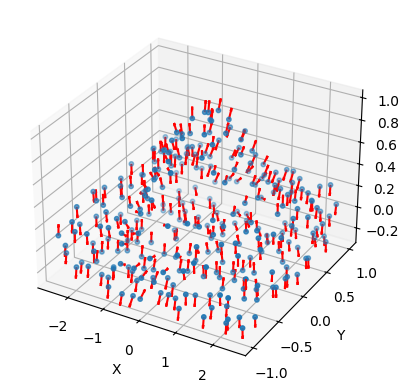

In [31]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=0, azim=120)

# 플롯 보여주기
plt.show()